### WORKING WITH IMAGE DATA LOADERS 
#### TUTORIAL: Beginner’s Guide to Loading Image Data with PyTorch
##### LINK: https://towardsdatascience.com/beginners-guide-to-loading-image-data-with-pytorch-289c60b7afec
##### DATASET: https://www.kaggle.com/datasets/fnguyen/vaporarray

In [30]:
### IMPORTS ###
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [17]:
# Load data
image_size = 64 # we'll see about that
DATA_DIR = '../../datasets/Vaporarray/test.out.npy'
X_train = np.load(DATA_DIR)


In [18]:
# Print basic info
print("Shape of training data: " + str(X_train.shape))
print("Data type: " + str(type(X_train)))
print(type(X_train[0][0][0][0]))

Shape of training data: (909, 128, 128, 3)
Data type: <class 'numpy.ndarray'>
<class 'numpy.float64'>


In [19]:
# convert from float64 to uint8 (for pytorch)
data = X_train.astype(np.float64)
data = 255 * data
X_train = data.astype(np.uint8)

In [20]:
print(type(X_train[0][0][0][0]))

<class 'numpy.uint8'>


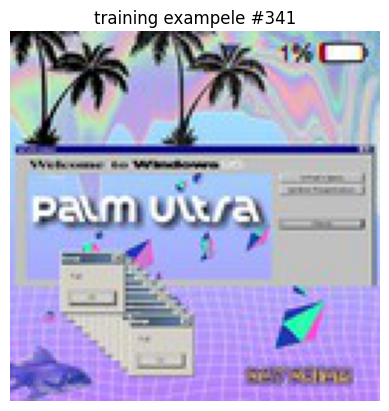

In [26]:
random_image = random.randint(0, len(X_train))
plt.imshow(X_train[random_image])
plt.title(f"training exampele #{random_image}")
plt.axis('off')
plt.show()

In [27]:
# create a custom class
class vaporwaveDataset(Dataset):
    def __init__(self, X):
        'Initialization'
        self.X = X
        
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)
    
    def __getitem__(self, index):
        'Generates one sample of data'
        # select sample
        image = self.X[index]
        X = self.transform(image)
        return X
    
    transform = T.Compose([
        T.ToPILImage(),
        T.Resize(image_size),
        T.ToTensor()
    ])
    
    
    
        

In [32]:
batch_size = 64
transformed_dataset = vaporwaveDataset(X_train)
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [35]:
# Visualize images
# helper functions
def show_images(images, nmax=64):
    fix, ax = plt.subplots(figsize=(8,8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break
        

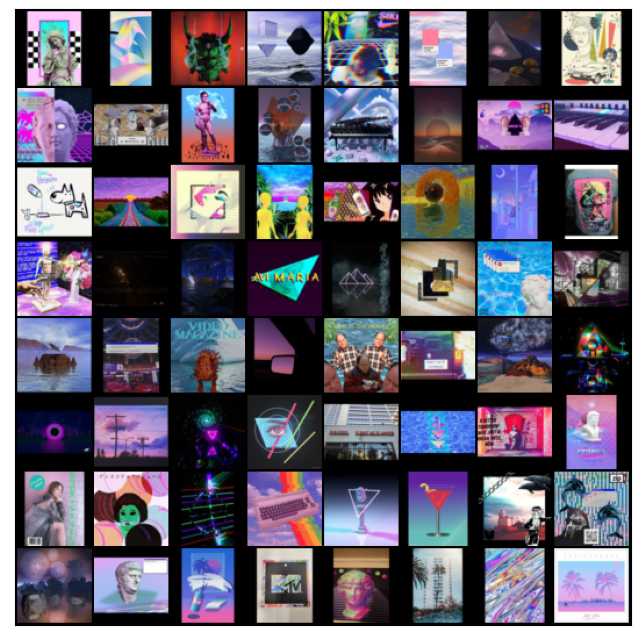

In [39]:
show_batch(train_dl)

In [40]:
class croppedDataset(Dataset):
    'Characterizez a dataset for Pytorch'
    def __init__(self, ims):
        'Initialization'
        self.ims = ims
    
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.ims)
    
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.ims[index]
        X = self.transform(image)
        return X
    
    transform = T.Compose([
        T.ToPILImage(),
        T.CenterCrop(0.75 * 64),
        T.Resize(image_size),
        #T.RandomResizedCrop(image_size),
        T.RandomHorizontalFlip(),
        T.ToTensor()])

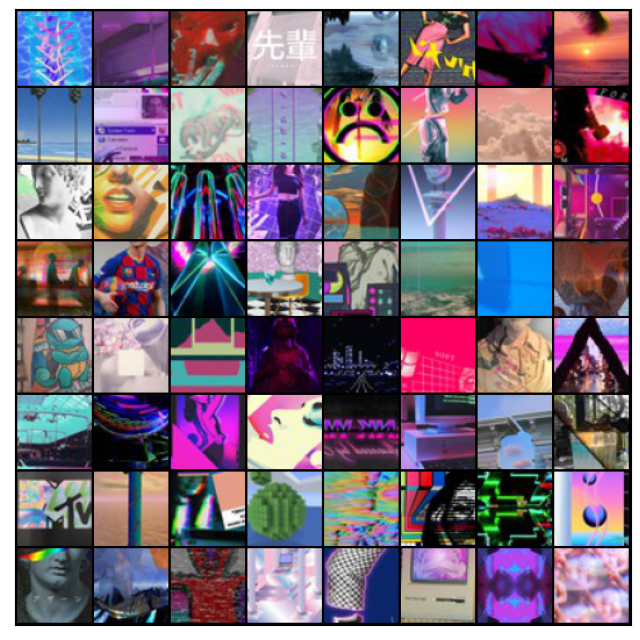

In [41]:
batch_size = 64
cropped_dataset = croppedDataset(ims=X_train)
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
show_batch(train_dl)